- 引用

https://datumstudio.jp/blog/matplotlib-2%E8%BB%B8%E3%82%B0%E3%83%A9%E3%83%95%E3%81%AE%E6%9B%B8%E3%81%8D%E6%96%B9
https://www.delftstack.com/ja/howto/matplotlib/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

- input ⇒yyyymm, カウントデータ
- pivot でデータ整形、加入率の算出
- 棒グラフ、線グラフで推移の表示
- 棒グラフ、線グラフで実際値と加入率の比較

# 読み込み

In [97]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [78]:
pd_cal_uu = pd.read_csv("../data/input/cal_uu.csv")
pd_countact_count = pd.read_csv("../data/input/contact_count.csv")
pd_effective_count = pd.read_csv("../data/input/effective_count.csv")
pd_join_count = pd.read_csv("../data/input/join_count.csv")


In [79]:
pd_cal_uu.head(3)

,yyyymm,cal_uu
0,2019-01,32509
1,2019-02,29040
2,2019-03,50264


In [80]:
pd_countact_count.head(3)

,yyyymm,contact
0,2019-01,9975
1,2019-02,3745
2,2019-03,2983


In [81]:
pd_effective_count.head(3)

,yyyymm,effective_count
0,2019-01,590
1,2019-02,348
2,2019-03,745


In [82]:
pd_join_count.head(3)

,yyyymm,join_count
0,2019-01,47
1,2019-02,27
2,2019-03,27


# yyyymm結合

In [83]:
df_tmp_out = pd.merge(pd_cal_uu, 
                    pd_countact_count, 
                    on = 'yyyymm',
                    how='outer')

df_tmp_out = pd.merge(df_tmp_out, 
                      pd_effective_count, 
                      on = 'yyyymm',
                      how='outer')

df_tmp_out = pd.merge(df_tmp_out, 
                      pd_join_count, 
                      on = 'yyyymm',
                      how='outer')

In [84]:
df_tmp_out.head(3)

,yyyymm,cal_uu,contact,effective_count,join_count
0,2019-01,32509,9975,590,47
1,2019-02,29040,3745,348,27
2,2019-03,50264,2983,745,27


# 型変更

In [85]:
df_tmp_out.dtypes

yyyymm             object
cal_uu              int64
contact             int64
effective_count     int64
join_count          int64
dtype: object

# 架電数推移

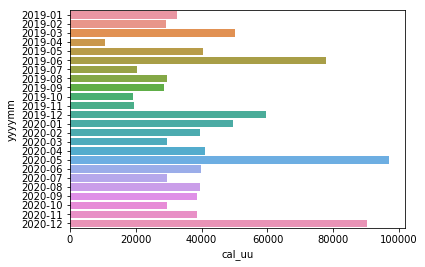

In [87]:
sns.barplot(y="yyyymm", x="cal_uu", data=df_tmp_out)

# 架電数 & コンタクト率

## 上下に配置

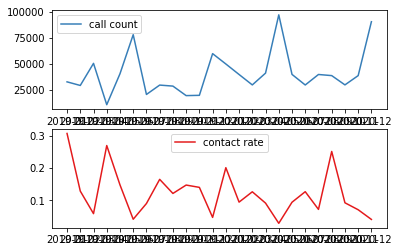

In [107]:
# figureオブジェクトを作成
fig = plt.figure()
# figureオブジェクトに属するaxesオブジェクトを生成
# ex)211 ⇒ 2×1の1へグラフ  212 ⇒ 2×1の2へグラフ
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
 
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.plot(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"],
         color=cm.Set1.colors[1], label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["contact"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="contact rate")
 
#凡例をつける
ax1.legend()
ax2.legend()

## 1つのグラフ中に配置

(0, 0.36820572764465226)

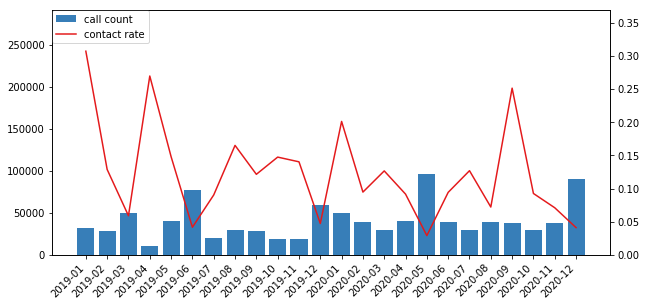

In [121]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["contact"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="contact rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 3 * max(df_tmp_out["cal_uu"])
register_max = 1.2 * max(df_tmp_out["contact"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])

# 架電数 & 有効対話率

(0, 0.04005546349217085)

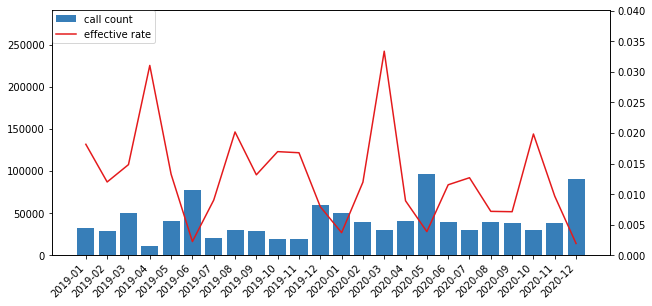

In [122]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["effective_count"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="effective rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 3 * max(df_tmp_out["cal_uu"])
register_max = 1.2 * max(df_tmp_out["effective_count"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])

# 架電数 & 加入率

(0, 0.003067310423175234)

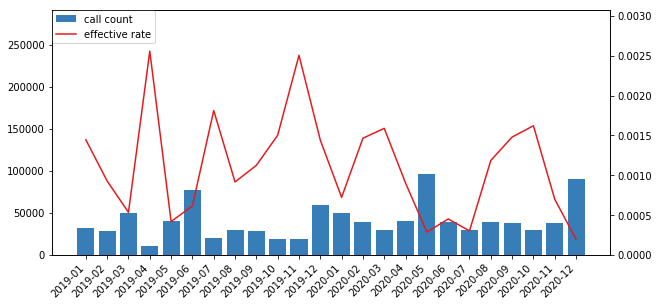

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

fig, ax1 = plt.subplots()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
  
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.bar(df_tmp_out["yyyymm"], df_tmp_out["cal_uu"], color=cm.Set1.colors[1],
        label="call count")
ax2.plot(df_tmp_out["yyyymm"], df_tmp_out["join_count"]/df_tmp_out["cal_uu"],
         color=cm.Set1.colors[0], label="effective rate")
 
fig.autofmt_xdate(rotation=45)
    
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 3 * max(df_tmp_out["cal_uu"])
register_max = 1.2 * max(df_tmp_out["join_count"]/df_tmp_out["cal_uu"])
    
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])